# Task 1 - Spark

In [46]:
#libraries 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
ini_data = pd.read_csv("/content/drive/MyDrive/spark/task-1-data.csv")
ini_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [55]:
ini_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [57]:
ini_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [58]:
ini_data.isna().sum()

Hours     0
Scores    0
dtype: int64

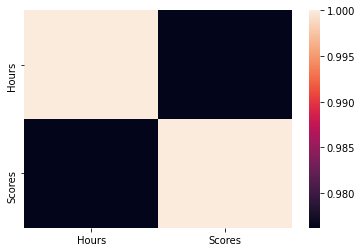

In [59]:
sea = ini_data.corr()
sns.heatmap(sea)

In [60]:
y = ini_data[['Scores']]
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [62]:
x = ini_data[['Hours']]
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


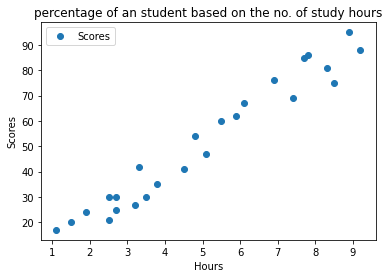

In [63]:
ini_data.plot(x='Hours',y='Scores',style='o')
plt.title('percentage of an student based on the no. of study hours')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)
print("X train: ",X_train.shape)
print("X test: ",X_test.shape)
print("Y train: ",Y_train.shape)
print("Y test: ",Y_test.shape)

X train:  (20, 1)
X test:  (5, 1)
Y train:  (20, 1)
Y test:  (5, 1)


In [88]:
lm = linear_model.LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
y_predict = lm.predict(X_test)
print(y_predict)

[[12.44258714]
 [26.35944834]
 [20.39507925]
 [92.9615698 ]
 [70.09815497]]


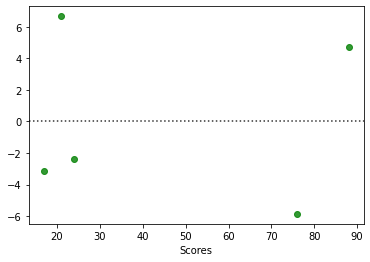

In [91]:
sns.residplot(x=Y_test,y=y_predict, color='g')

In [92]:
#Mean Absolute Error
print("Mean Absolute Error : ",mean_absolute_error(Y_test,y_predict))

#Mean Squared Error
print("Mean Squared Error : ",mean_squared_error(Y_test, y_predict))

#R2 score
print("R2 Score : ",r2_score(Y_test, y_predict))

#Score
print('Score : ', lm.score(X_test,Y_test))

Mean Absolute Error :  4.877039354964476
Mean Squared Error :  24.387620339856596
R2 Score :  0.9735538080811826
Score :  0.9735538080811826


# Completed